Análise da normalidade dos dados e transformação Boxcox

In [ ]:
# Testes KS e SW, gráfico de probabilidade Normal
# No caso de distribuição não Normal, efetua a Transformação dos dados / Box-Cox
# e executa novos testes de Normalidade nos dados transformados (y)
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# Entrada de dados / erros de potencia (W)
# Coagulation 
dados=pd.DataFrame({'resultado':[-1.6,1.1,-4.1,-2.6,-0.6,-4.5,-1,3.1,-0.8,-0.4,0.5,-3.4,-0.4,3.7,-2.5,-0.8,1.4,-3.4,-2,-4.1,-9.9,-1.2,3.7,-6.8,-1.2,2,-3.4,-2.6,0.2,0.8,-0.6,3.4,0,0,0.8,-2.5,-0.6,4,-4.1,2.7,0,-3.4,-2.7,-3.8,-6.6,-3.3,1.4,-3.4,-1.2,1.7,-3.4,-1.8,3.1,-7.3,-0.6,4,0,0,1.4,-1.7,-0.6,4,-3.4,-2.1,3.7,-7.3,-2.4,2.4,-5.7,-3,-4.7,-11.8,-1,2.4,-2.5,-3.1,-3.6,-4.5,-0.4,3.7,0,0,1.1,-2.5,-0.6,3.7,-4.1,2,-3.5,-0.1,-3.3,-0.6,-6.6,-2.1,-0.6,-2.5,-1,3.1,-2.5,-3.6,-2.8,-2.5,-0.4,4,0,0,1.4,-1.7,-0.6,3.4,-3.4,-1.6,3.7,-1.7,-1.4,-1.2,-6.8,0.6,3.4,0.8]})


In [ ]:
# Visualizando as cinco primeiras linhas do arquivo
dados.head()

,resultado
0,-1.6
1,1.1
2,-4.1
3,-2.6
4,-0.6


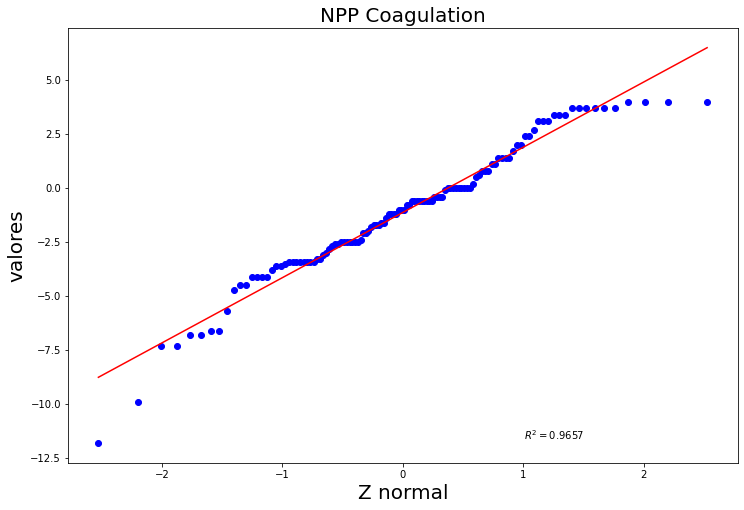

In [ ]:
# Análise gráfica da normalidade
fig= plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
normality_plot, stat=stats.probplot(dados.resultado, plot=plt,rvalue=True)
ax.set_title("NPP Coagulation", fontsize=20)
ax.set
plt.xlabel("Z normal", fontsize=20)
plt.ylabel("valores", fontsize=20)
plt.show()

A analise da normalidade mostra que a hipótese de distribuição Normal dos erros de Potência de Coagulation não deve ser rejeitada. Isto pode ser observado pelo gráfico de probabilidade Normal e verificado pelo teste Komolgorov-Smirnov, KS, usando algoritmo em R, onde encontramos D=0.071 e p=0.5762, não podendo rejeitar a Normalidade. 


In [ ]:
# Analise de dados de cutting
# Entrada de dados / erros de potencia (W)
# Cutting 
dados=pd.DataFrame({'resultado':[-3.2,8.2,21.9,0.8,7.2,12.6,-3.6,1.9,21.9,3.2,3.9,16.5,0,8.2,50.9,-0.3,8.2,23.3,1.6,10.1,21.9,-1.5,7.2,19.2,-3.1,9.1,19.2,0,9.1,8.5,-2.6,0.3,23.3,4.3,4.6,16.5,0.1,11.2,35.5,1.7,10.1,20.6,0.2,11.1,19.2,-1.1,9.1,23.3,-2.9,8.2,23.3,-0.7,8.2,7.1,-2.8,0.7,26,4.9,4,16.5,0,9.4,42.5,-0.1,6.3,20.6,0.4,12,17.9,0,8.2,17.9,-2.8,8.2,19.2,-0.3,8.2,12.6,-2.5,2,23.3,4.8,3.5,17.9,0,10.1,39.8,-0.3,7.2,23.3,-0.3,13,20.6,-0.3,10.1,19.2,-2.8,9.1,19.2,1.1,8.2,11.1,-2,2.9,19.2,5,3.1,15.2,0.1,11,37,1.3,6.3,24.6,1.4,10.1,20.6,-0.7,9.1,23.3]})


In [ ]:
# Visualizando as cinco primeiras linhas do arquivo
dados.head()

,resultado
0,-3.2
1,8.2
2,21.9
3,0.8
4,7.2


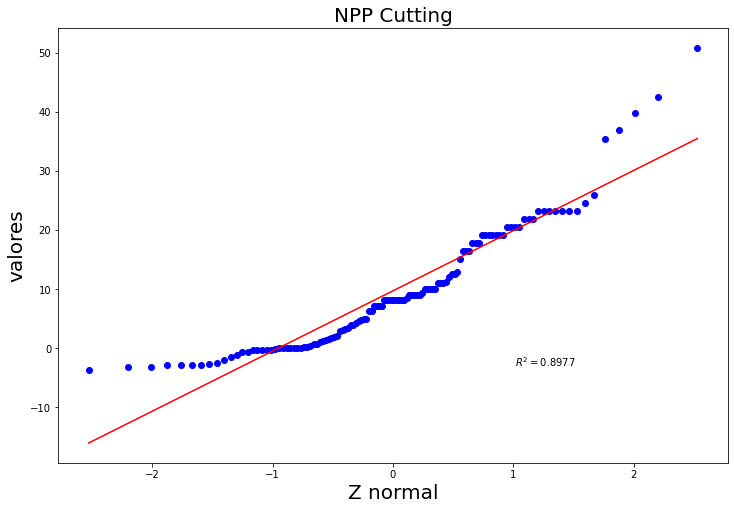

In [ ]:
# Análise gráfica da normalidade
fig= plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
normality_plot, stat=stats.probplot(dados.resultado, plot=plt,rvalue=True)
ax.set_title("NPP Cutting", fontsize=20)
ax.set
plt.xlabel("Z normal", fontsize=20)
plt.ylabel("valores", fontsize=20)
plt.show()

Conclusão sobre a Normalidade dos dados de erros de potência de Cutting: Deve-se rejeitar a hipótese de Normalidade dos dados, comprovada pelo Teste KS (feito com algortimo R), onde D=0.593 e p=2.2x10^-16.
Assim, procedemos a transformação dos dados pelo método Boxcox.

In [ ]:
# Verificar se os dados são negativos, e caso necessário transformar em positivos somando lambda2
menor=dados.min()
menor=int(menor)
if menor<0:
  lambda2=1+abs(menor)
else:
  lambda2=0
print(menor)
print(lambda2)

-3
4


In [ ]:
# Retorna array com dados transformados (y), valor LAMBDA 
# e Intervalo de confiança IC(95%) para LAMBDA
dados1=dados.resultado+lambda2
from scipy.stats import boxcox
y2,fitted_lambda,(min_ci,max_ci)= boxcox(dados1, lmbda=None, alpha=0.05)
y2,fitted_lambda,(min_ci,max_ci)

(array([-0.21515156,  3.88174762,  5.82654181,  2.05284526,  3.68974852,
         4.61965067, -0.79110199,  2.41049922,  5.82654181,  2.77945495,
         2.95979449,  5.17019497,  1.75639748,  3.88174762,  8.31199566,
         1.63496146,  3.88174762,  5.98140922,  2.31773708,  4.21925083,
         5.82654181,  1.06934737,  3.68974852,  5.51121606, -0.10355584,
         4.04570955,  5.51121606,  1.75639748,  4.04570955,  3.93727742,
         0.35579702,  1.87186538,  5.98140922,  3.05806744,  3.12970525,
         5.17019497,  1.79551355,  4.40085459,  7.14696343,  2.34902047,
         4.21925083,  5.67762177,  1.83399449,  4.38471705,  5.51121606,
         1.27494699,  4.04570955,  5.98140922,  0.09681983,  3.88174762,
         5.98140922,  1.46229555,  3.88174762,  3.66992478,  0.18789916,
         2.01769841,  6.26564709,  3.19968504,  2.98467021,  5.17019497,
         1.75639748,  4.09867875,  7.7085703 ,  1.71661952,  3.50684729,
         5.67762177,  1.90914975,  4.52745906,  5.3

O valor lambda para transformação da variável é lambda=0.32891

In [ ]:
# DADOS TRANSFORMADOS y (descontando valor para tornar todos positivos, lambda2)
y=y2-lambda2

In [ ]:
y

array([-4.21515156, -0.11825238,  1.82654181, -1.94715474, -0.31025148,
        0.61965067, -4.79110199, -1.58950078,  1.82654181, -1.22054505,
       -1.04020551,  1.17019497, -2.24360252, -0.11825238,  4.31199566,
       -2.36503854, -0.11825238,  1.98140922, -1.68226292,  0.21925083,
        1.82654181, -2.93065263, -0.31025148,  1.51121606, -4.10355584,
        0.04570955,  1.51121606, -2.24360252,  0.04570955, -0.06272258,
       -3.64420298, -2.12813462,  1.98140922, -0.94193256, -0.87029475,
        1.17019497, -2.20448645,  0.40085459,  3.14696343, -1.65097953,
        0.21925083,  1.67762177, -2.16600551,  0.38471705,  1.51121606,
       -2.72505301,  0.04570955,  1.98140922, -3.90318017, -0.11825238,
        1.98140922, -2.53770445, -0.11825238, -0.33007522, -3.81210084,
       -1.98230159,  2.26564709, -0.80031496, -1.01532979,  1.17019497,
       -2.24360252,  0.09867875,  3.7085703 , -2.28338048, -0.49315271,
        1.67762177, -2.09085025,  0.52745906,  1.35054883, -2.24

Teste da Normalidade dos dados transformados

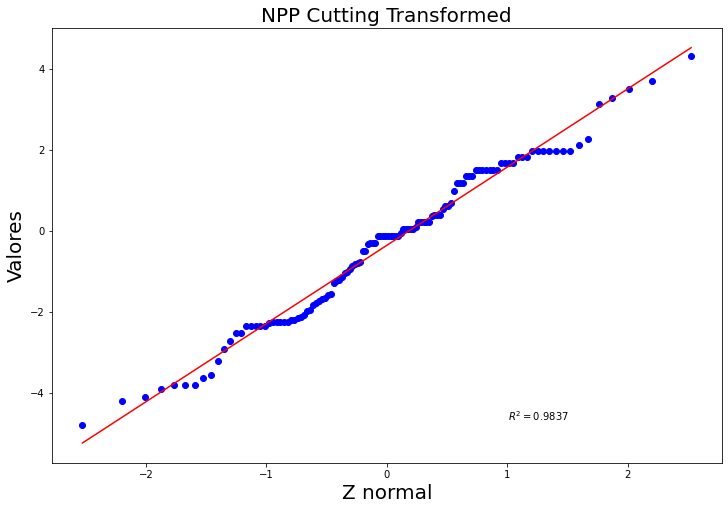

In [ ]:
# Plotando NPP de resíduos do modelo / dados transformados (y)
fig= plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
normality_plot, stat=stats.probplot(y, plot=plt,rvalue=True)
ax.set_title("NPP Cutting Transformed", fontsize=20)
ax.set
plt.xlabel("Z normal", fontsize=20)
plt.ylabel("Valores", fontsize=20)
plt.show()

CONCLUSÃO: OS DADOS TRANSFORMADOS dos erros de Potência de Cutting APRESENTAM DISTRIBUIÇÃO NORMAL